In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [29]:
start = "\033[1m"
end = "\033[0;0m"

In [30]:
dataframe = pd.read_csv("ufc-fighters-statistics.csv")
df = dataframe.copy() 

In [31]:
df.head(5)

name    nickname  wins  losses  draws  height_cm  \
0    Robert Drysdale         NaN     7       0      0     190.50   
1  Daniel McWilliams  The Animal    15      37      0     185.42   
2         Dan Molina         NaN    13       9      0     177.80   
3          Paul Ruiz         NaN     7       4      0     167.64   
4    Collin Huckbody      All In     8       2      0     190.50   

   weight_in_kg  reach_in_cm    stance date_of_birth  \
0         92.99          NaN  Orthodox    1981-10-05   
1         83.91          NaN       NaN           NaN   
2         97.98          NaN       NaN           NaN   
3         61.23          NaN       NaN           NaN   
4         83.91       193.04  Orthodox    1994-09-29   

   significant_strikes_landed_per_minute  significant_striking_accuracy  \
0                                   0.00                            0.0   
1                                   3.36                           77.0   
2                                   0.00                            0.0   
3                                   1.40                           33.0   
4                                   2.05                           60.0   

   significant_strikes_absorbed_per_minute  significant_strike_defence  \
0                                     0.00                         0.0   
1                                     0.00                         0.0   
2                                     5.58                        60.0   
3                                     1.40                        75.0   
4                                     2.73                        42.0   

   average_takedowns_landed_per_15_minutes  takedown_accuracy  \
0                                     7.32              100.0   
1                                     0.00                0.0   
2                                     0.00                0.0   
3                                     0.00                0.0   
4                                    10.23              100.0   

   takedown_defense  average_submissions_attempted_per_15_minutes  
0               0.0                                          21.9  
1             100.0                                          21.6  
2               0.0                                          20.9  
3             100.0                                          20.9  
4               0.0                                          20.4

In [32]:
df.shape

(4111, 18)

In [33]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')

In [34]:
df.isna().sum()

name                                               0
nickname                                        1854
wins                                               0
losses                                             0
draws                                              0
height_cm                                        298
weight_in_kg                                      87
reach_in_cm                                     1927
stance                                           823
date_of_birth                                   1135
significant_strikes_landed_per_minute              0
significant_striking_accuracy                      0
significant_strikes_absorbed_per_minute            0
significant_strike_defence                         0
average_takedowns_landed_per_15_minutes            0
takedown_accuracy                                  0
takedown_defense                                   0
average_submissions_attempted_per_15_minutes       0
dtype: int64

In [35]:
df.drop(columns=['nickname'], inplace=True)
df.drop(columns=['reach_in_cm'], inplace=True)
df.replace({'DOB:': pd.NA},inplace=True)
df.fillna(pd.NA,inplace=True)

In [36]:
df.head(5)

name  wins  losses  draws  height_cm  weight_in_kg    stance  \
0    Robert Drysdale     7       0      0     190.50         92.99  Orthodox   
1  Daniel McWilliams    15      37      0     185.42         83.91      <NA>   
2         Dan Molina    13       9      0     177.80         97.98      <NA>   
3          Paul Ruiz     7       4      0     167.64         61.23      <NA>   
4    Collin Huckbody     8       2      0     190.50         83.91  Orthodox   

  date_of_birth  significant_strikes_landed_per_minute  \
0    1981-10-05                                   0.00   
1           NaT                                   3.36   
2           NaT                                   0.00   
3           NaT                                   1.40   
4    1994-09-29                                   2.05   

   significant_striking_accuracy  significant_strikes_absorbed_per_minute  \
0                            0.0                                     0.00   
1                           77.0                                     0.00   
2                            0.0                                     5.58   
3                           33.0                                     1.40   
4                           60.0                                     2.73   

   significant_strike_defence  average_takedowns_landed_per_15_minutes  \
0                         0.0                                     7.32   
1                         0.0                                     0.00   
2                        60.0                                     0.00   
3                        75.0                                     0.00   
4                        42.0                                    10.23   

   takedown_accuracy  takedown_defense  \
0              100.0               0.0   
1                0.0             100.0   
2                0.0               0.0   
3                0.0             100.0   
4              100.0               0.0   

   average_submissions_attempted_per_15_minutes  
0                                          21.9  
1                                          21.6  
2                                          20.9  
3                                          20.9  
4                                          20.4

In [37]:
df["matches_played"] = df["wins"] + df["losses"] + df["draws"]
df["win_perc"] = round((df["wins"] / df["matches_played"]),2) * 100
df["los_perc"] = round((df["losses"] / df["matches_played"]),2) * 100
df["draw_perc"] = round((df["draws"] / df["matches_played"]),2) * 100

In [40]:
# Define conditions
conditions = [
    (df['weight_in_kg'].isna()),  # Not know
    (df['weight_in_kg'] <= 57.0),  # Flyweight
    (df['weight_in_kg'] > 57.0) & (df['weight_in_kg'] <= 61.2),  # Bantamweight
    (df['weight_in_kg'] > 61.2) & (df['weight_in_kg'] <= 65.8),  # Featherweight
    (df['weight_in_kg'] > 65.8) & (df['weight_in_kg'] <= 70.0),  # Lightweight
    (df['weight_in_kg'] > 70.0) & (df['weight_in_kg'] <= 77.1),  # Welterweight
    (df['weight_in_kg'] > 77.1) & (df['weight_in_kg'] <= 83.9),  # Middleweight
    (df['weight_in_kg'] > 83.9) & (df['weight_in_kg'] <= 93.0),  # Light Heavyweight
    (df['weight_in_kg'] > 93.0)  # Heavyweight
]

# Define values
values = [
    'Not know', 'Flyweight', 'Bantamweight', 'Featherweight',
    'Lightweight', 'Welterweight', 'Middleweight',
    'Light Heavyweight', 'Heavyweight'
]

# Create a new column with np.select
df['Weight_class'] = np.select(conditions, values, default='Unknown')

In [41]:
print(df.columns)

Index(['name', 'wins', 'losses', 'draws', 'height_cm', 'weight_in_kg',
       'stance', 'date_of_birth', 'significant_strikes_landed_per_minute',
       'significant_striking_accuracy',
       'significant_strikes_absorbed_per_minute', 'significant_strike_defence',
       'average_takedowns_landed_per_15_minutes', 'takedown_accuracy',
       'takedown_defense', 'average_submissions_attempted_per_15_minutes',
       'matches_played', 'win_perc', 'los_perc', 'draw_perc', 'Weight_class'],
      dtype='object')


In [42]:
physical_attributes = ['height_cm', 'weight_in_kg']
performance_metrics = ['wins', 'losses', 'draws']

print("Descriptive Statistics:")
print(df[physical_attributes + performance_metrics].describe())

Descriptive Statistics:
         height_cm  weight_in_kg         wins       losses        draws
count  3813.000000   4024.000000  4111.000000  4111.000000  4111.000000
mean    178.234325     77.395825    12.366821     5.726344     0.264413
std       8.888050     17.982242     9.374667     5.103768     0.822373
min     152.400000     47.630000     0.000000     0.000000     0.000000
25%     172.720000     65.770000     7.000000     2.000000     0.000000
50%     177.800000     77.110000    11.000000     5.000000     0.000000
75%     185.420000     83.910000    17.000000     8.000000     0.000000
max     226.060000    349.270000   253.000000    83.000000    11.000000


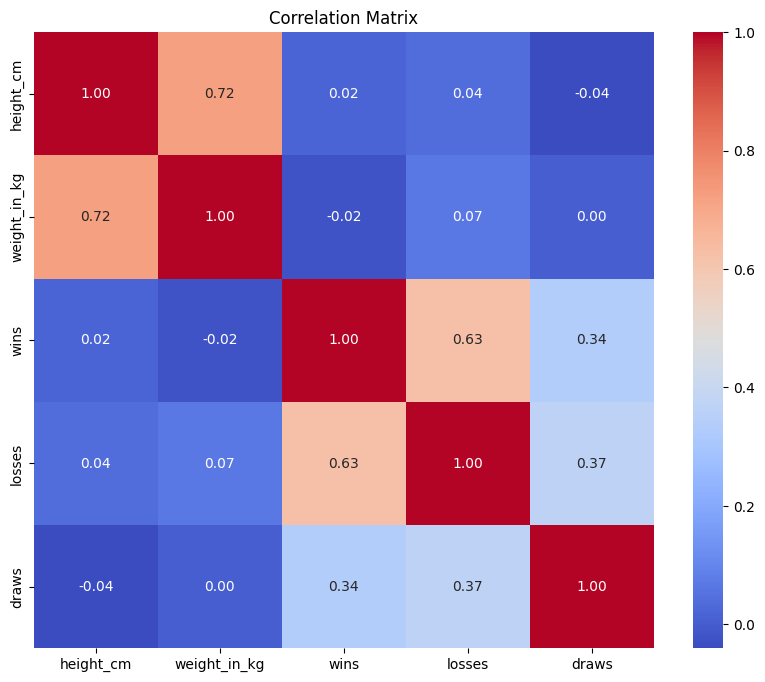

In [43]:
correlation_matrix = df[physical_attributes + performance_metrics].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

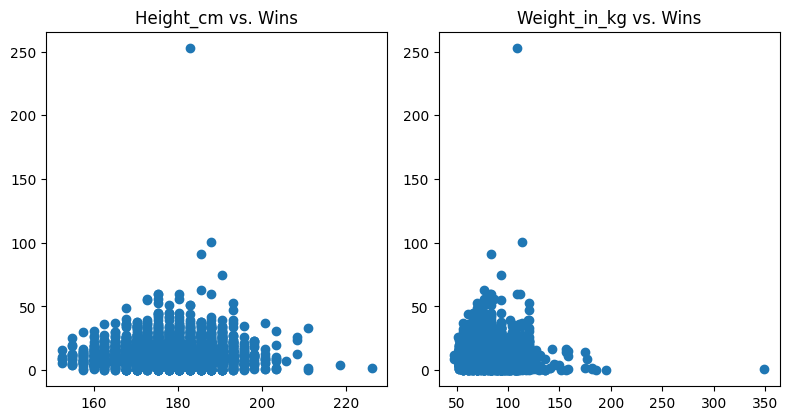

In [44]:
plt.figure(figsize=(8, 8))

for i, attribute in enumerate(physical_attributes):
    plt.subplot(2, 2, i + 1)
    plt.scatter(df[attribute], df['wins'])
    plt.title(f'{attribute.capitalize()} vs. Wins')

plt.tight_layout()
plt.show()

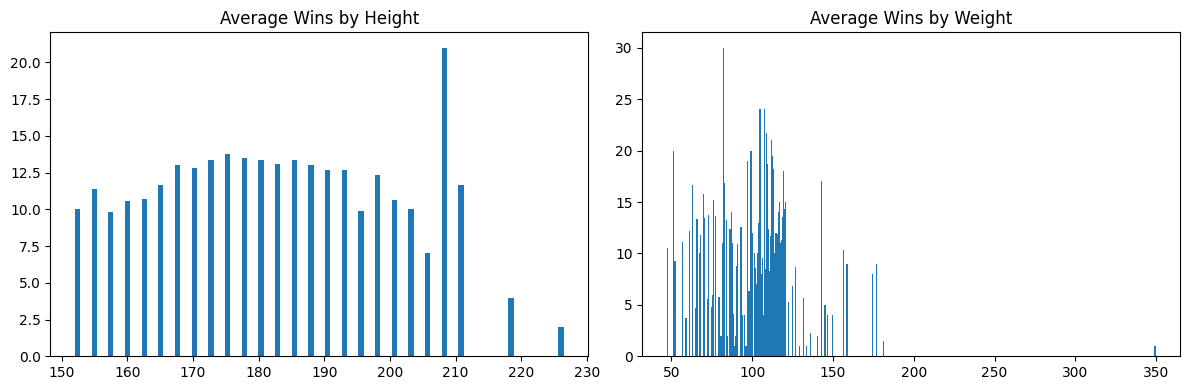

In [45]:
grouped_height = df.groupby('height_cm')['wins'].mean().reset_index()
grouped_weight = df.groupby('weight_in_kg')['wins'].mean().reset_index()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(grouped_height['height_cm'], grouped_height['wins'])
plt.title('Average Wins by Height')

plt.subplot(1, 2, 2)
plt.bar(grouped_weight['weight_in_kg'], grouped_weight['wins'])
plt.title('Average Wins by Weight')

plt.tight_layout()
plt.show()

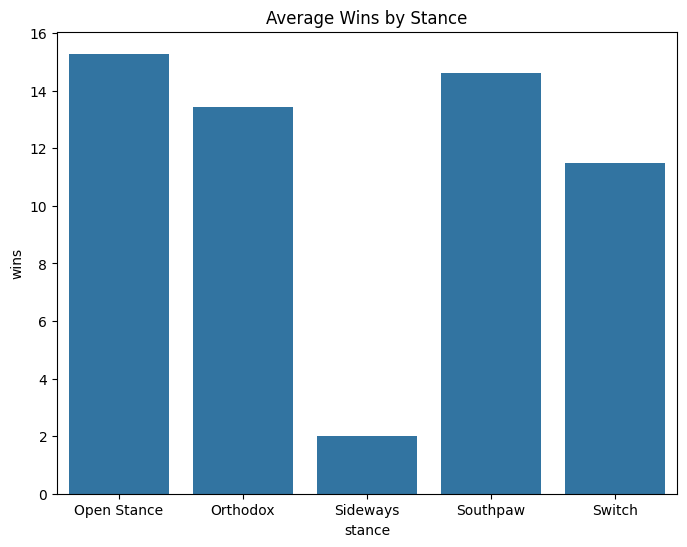

In [46]:
stance_performance = df.groupby('stance')['wins'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='stance', y='wins', data=stance_performance)
plt.title('Average Wins by Stance')
plt.show()

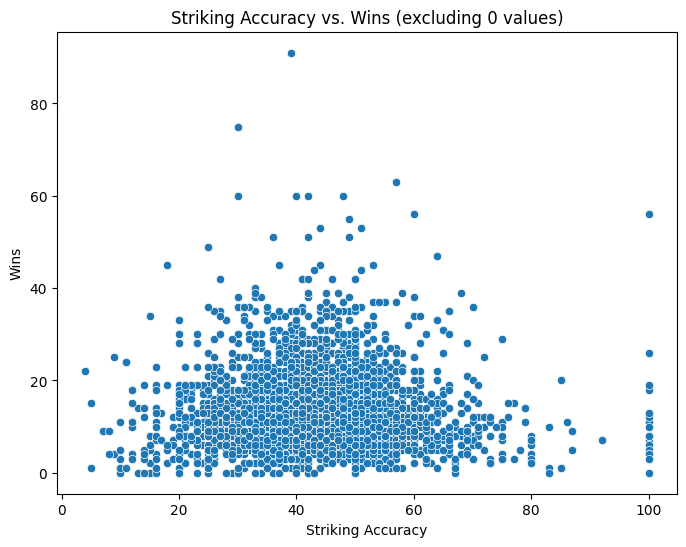

Correlation Coefficient: -0.007914999601794735


In [47]:
# Filter out rows where striking accuracy is 0
df_filtered = df[df['significant_striking_accuracy'] > 0]

# Scatter plot of striking accuracy vs. wins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='significant_striking_accuracy', y='wins', data=df_filtered)
plt.title('Striking Accuracy vs. Wins (excluding 0 values)')
plt.xlabel('Striking Accuracy')
plt.ylabel('Wins')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df_filtered['significant_striking_accuracy'].corr(df_filtered['wins'])
print(f"Correlation Coefficient: {correlation_coefficient}")

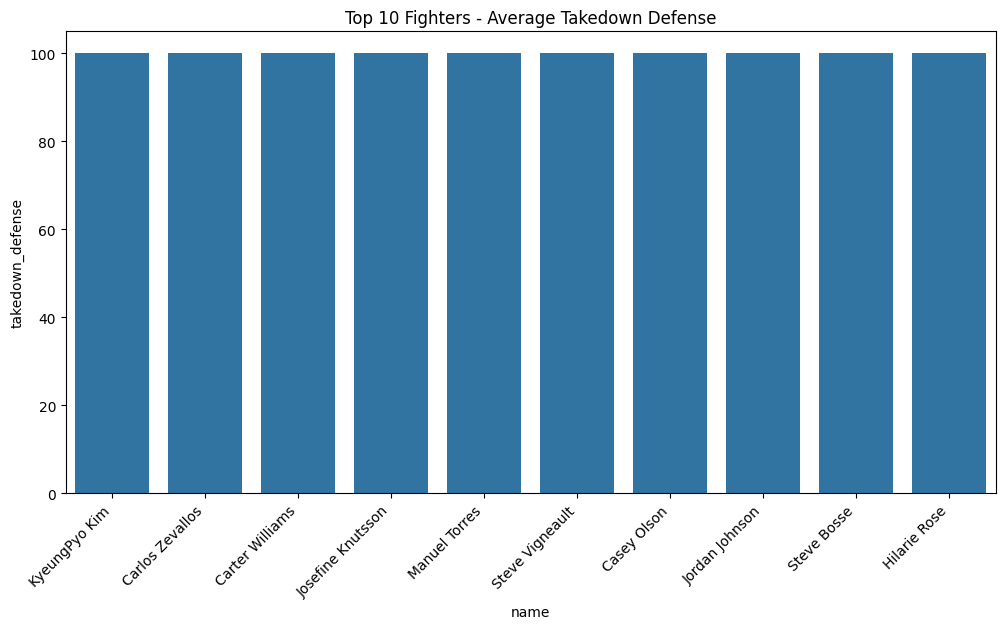

In [48]:
# Group by fighter and calculate average takedown defense
fighter_takedown_defense = df.groupby('name')['takedown_defense'].mean().reset_index()

# Sort fighters by average takedown defense in descending order
top_10_fighters = fighter_takedown_defense.sort_values(by='takedown_defense', ascending=False).head(10)

# Create a bar chart for the top 10 fighters
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='takedown_defense', data=top_10_fighters)
plt.title('Top 10 Fighters - Average Takedown Defense')
plt.xticks(rotation=45, ha='right')
plt.show()

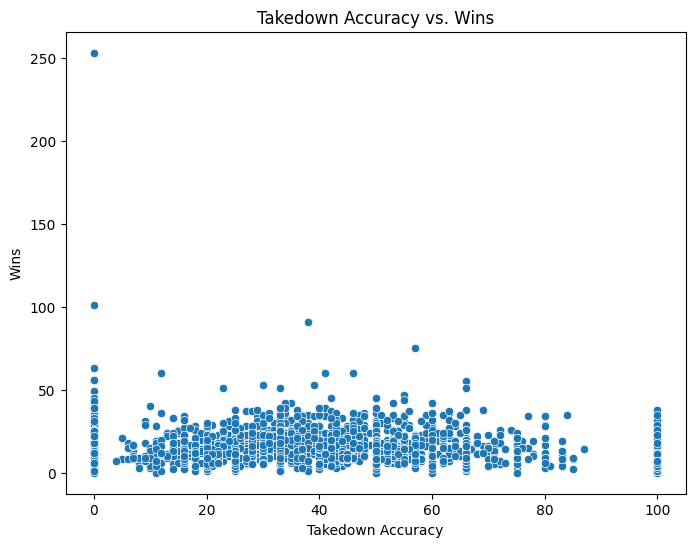

Correlation Coefficient: 0.1923105237001913


In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='takedown_accuracy', y='wins', data=df)
plt.title('Takedown Accuracy vs. Wins')
plt.xlabel('Takedown Accuracy')
plt.ylabel('Wins')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df['takedown_accuracy'].corr(df['wins'])
print(f"Correlation Coefficient: {correlation_coefficient}")

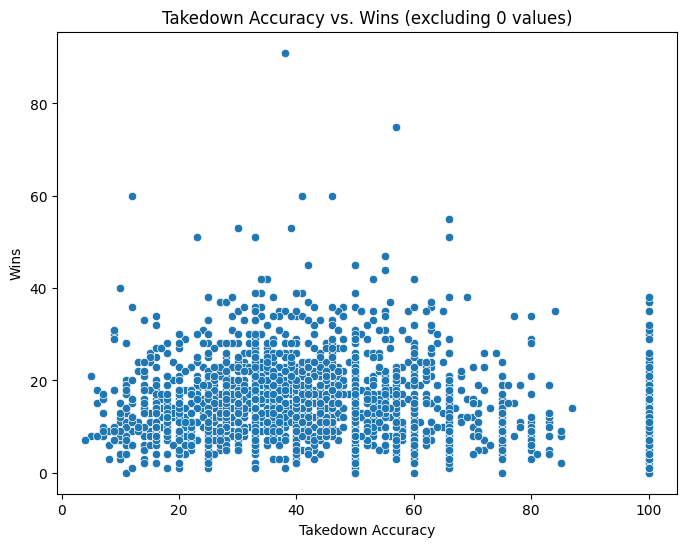

Correlation Coefficient: -0.09334276792217182


In [50]:
# Filter out rows where takedown accuracy is 0
df_filtered_takedown = df[df['takedown_accuracy'] > 0]

# Scatter plot of takedown accuracy vs. wins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='takedown_accuracy', y='wins', data=df_filtered_takedown)
plt.title('Takedown Accuracy vs. Wins (excluding 0 values)')
plt.xlabel('Takedown Accuracy')
plt.ylabel('Wins')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df_filtered_takedown['takedown_accuracy'].corr(df_filtered_takedown['wins'])
print(f"Correlation Coefficient: {correlation_coefficient}")

In [51]:
# Calculate Overall Striking Performance
df['overall_striking'] = (df['significant_striking_accuracy'] + (100 - df['significant_strike_defence'])) / 2

In [52]:
# Identify Top Fighters
top_fighters = df[['name', 'overall_striking']].sort_values(by='overall_striking', ascending=False).head(10)
print(top_fighters)

                     name  overall_striking
3236  Waachiim Spiritwolf             100.0
2540        David Gardner             100.0
3607    Victor Valenzuela             100.0
56          Shamil Gaziev             100.0
2927         Derek Downey              94.0
3469       Yurij Kiseliov              93.5
3674           Wade Shipp              93.0
100         Clay Mitchell              92.5
3856        Gian Siqueira              90.5
159      Samandar Murodov              90.0


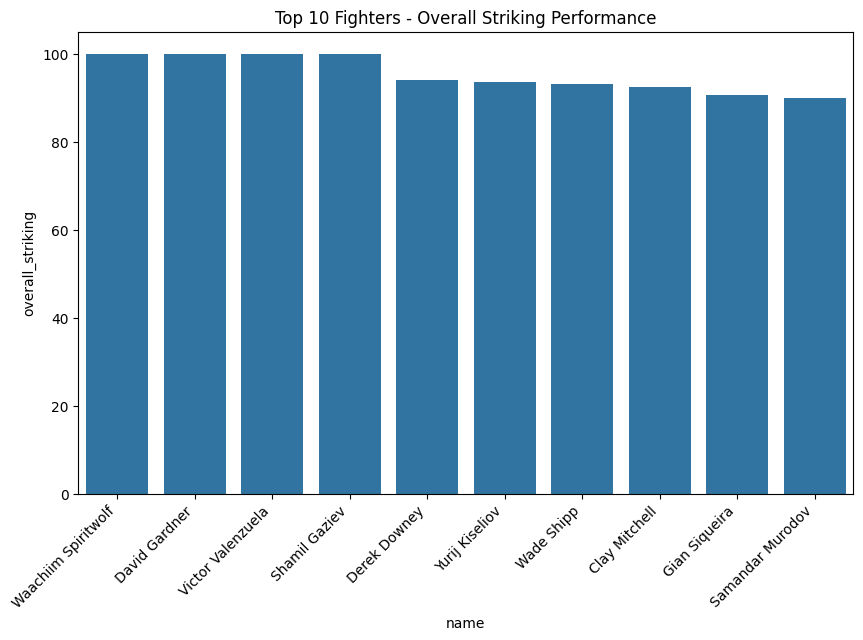

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='overall_striking', data=top_fighters)
plt.title('Top 10 Fighters - Overall Striking Performance')
plt.xticks(rotation=45, ha='right')
plt.show()

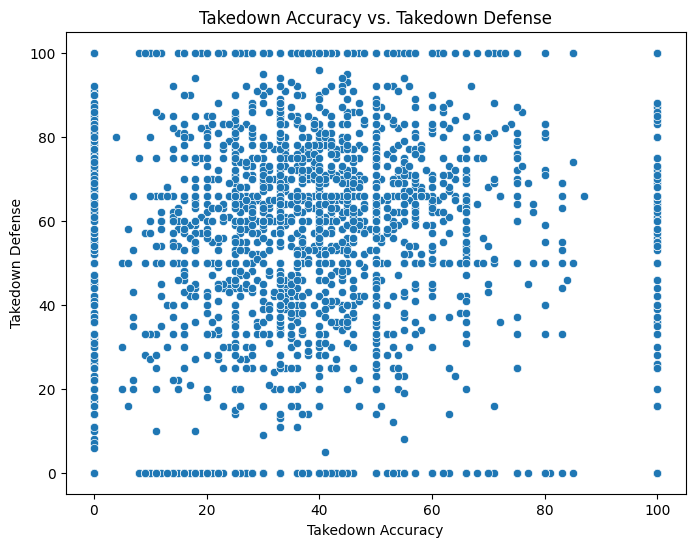

Correlation Coefficient: 0.3459089990223145


In [54]:
# Scatter plot of takedown accuracy vs. takedown defense
plt.figure(figsize=(8, 6))
sns.scatterplot(x='takedown_accuracy', y='takedown_defense', data=df)
plt.title('Takedown Accuracy vs. Takedown Defense')
plt.xlabel('Takedown Accuracy')
plt.ylabel('Takedown Defense')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df['takedown_accuracy'].corr(df['takedown_defense'])
print(f"Correlation Coefficient: {correlation_coefficient}")

                name  submission_attempt_rate
0    Robert Drysdale                     21.9
1  Daniel McWilliams                     21.6
3          Paul Ruiz                     20.9
2         Dan Molina                     20.9
4    Collin Huckbody                     20.4
5   Gerald Strebendt                     16.4
6        Isaiah Hill                     14.5
7   Kenneth Seegrist                     14.4
8          Will Kerr                     14.3
9         Neil Grove                     14.3


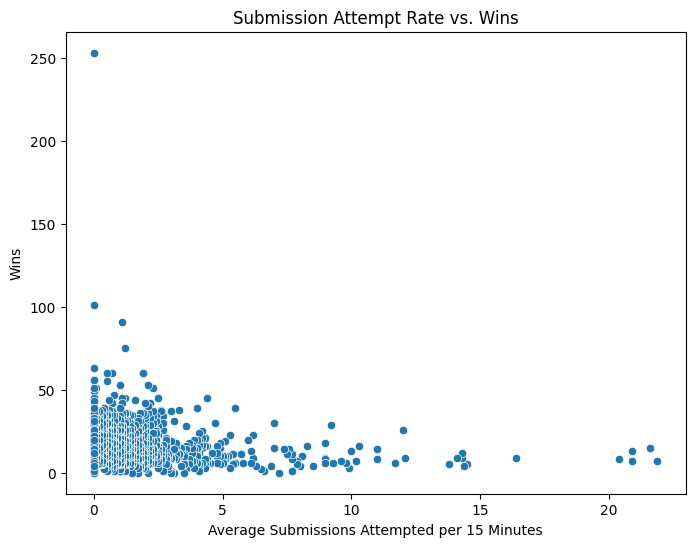

In [55]:
# Calculate submission attempt rate
df['submission_attempt_rate'] = df['average_submissions_attempted_per_15_minutes']

# Identify top fighters by submission attempt rate
top_submission_attempt_fighters = df[['name', 'submission_attempt_rate']].sort_values(by='submission_attempt_rate', ascending=False).head(10)
print(top_submission_attempt_fighters)

# Scatter plot of submission attempt rate vs. wins
plt.figure(figsize=(8, 6))
sns.scatterplot(x='average_submissions_attempted_per_15_minutes', y='wins', data=df)
plt.title('Submission Attempt Rate vs. Wins')
plt.xlabel('Average Submissions Attempted per 15 Minutes')
plt.ylabel('Wins')
plt.show()

In [56]:
df_undefeated = df.loc[df["los_perc"] == 0].sort_values(by=['wins'], ascending=False)
perc_undefeated_fig = round(df_undefeated.shape[0]/df.shape[0] * 100, 2)
ud_mean_match_played = round(df_undefeated["matches_played"].mean(), 1)
print("The " + start + str(perc_undefeated_fig) +  "%" + end + " of fighters are undefeated with an average of " + start + str(ud_mean_match_played) + end + " matches played")

top_10_fighters = df_undefeated.head(10)

The 3.75% of fighters are undefeated with an average of 7.3 matches played


The 3.21% of boxers haven't won a match with an average of 1.8 matches played


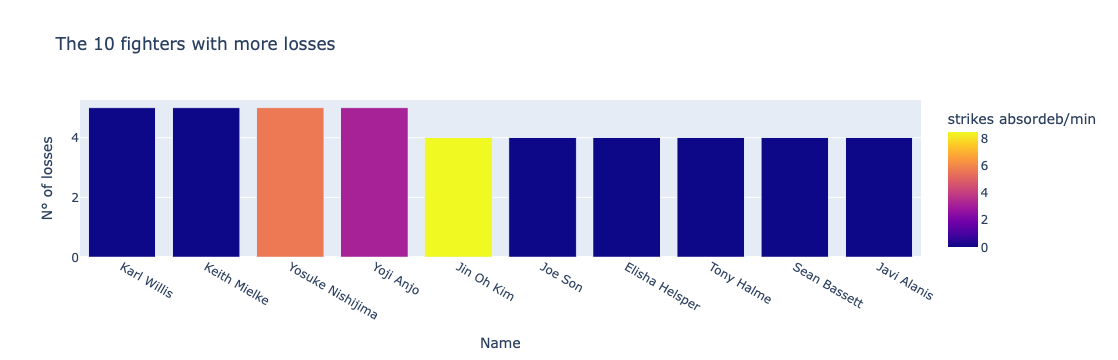

In [57]:
df_unwinning = df.loc[df["win_perc"] == 0].sort_values(by=['losses'], ascending=False)
perc_unwinning_fig = round(df_unwinning.shape[0]/df.shape[0] * 100, 2)
uw_mean_match_played = round(df_unwinning["matches_played"].mean(), 1)
print(f"The " + start + str(perc_unwinning_fig) +  "%" + end + " of boxers haven't won a match with an average of " + start + str(uw_mean_match_played) + end + " matches played")

worst_10_fighters = df_unwinning.head(10)
fig2 = px.bar(worst_10_fighters, x='name', y='losses', title = "The 10 fighters with more losses",
             labels={'name':'Name', 'losses': "N° of losses", "significant_strikes_absorbed_per_minute": "strikes absordeb/min"}, color = "significant_strikes_absorbed_per_minute")
fig2.show()

In [58]:
df.loc[df["wins"] == df["wins"].max()]

name  wins  losses  draws  height_cm  weight_in_kg    stance  \
3969  Travis Fulton   253      53     10     182.88        108.86  Orthodox   

     date_of_birth  significant_strikes_landed_per_minute  \
3969    1977-05-29                                    0.0   

      significant_striking_accuracy  ...  takedown_accuracy  takedown_defense  \
3969                            0.0  ...                0.0               0.0   

      average_submissions_attempted_per_15_minutes  matches_played  win_perc  \
3969                                           0.0             316      80.0   

      los_perc  draw_perc  Weight_class  overall_striking  \
3969      17.0        3.0   Heavyweight              50.0   

      submission_attempt_rate  
3969                      0.0  

[1 rows x 23 columns]

In [59]:
df.loc[df["weight_in_kg"] == df["weight_in_kg"].max()]

name  wins  losses  draws  height_cm  weight_in_kg  \
4069  Emmanuel Yarborough     1       2      0      203.2        349.27   

           stance date_of_birth  significant_strikes_landed_per_minute  \
4069  Open Stance    1960-09-05                                    0.0   

      significant_striking_accuracy  ...  takedown_accuracy  takedown_defense  \
4069                            0.0  ...                0.0               0.0   

      average_submissions_attempted_per_15_minutes  matches_played  win_perc  \
4069                                           0.0               3      33.0   

      los_perc  draw_perc  Weight_class  overall_striking  \
4069      67.0        0.0   Heavyweight              50.0   

      submission_attempt_rate  
4069                      0.0  

[1 rows x 23 columns]

In [60]:
weight_cat_list = set(df["Weight_class"].values)
print(weight_cat_list)

{'Bantamweight', 'Flyweight', 'Middleweight', 'Not know', 'Light Heavyweight', 'Welterweight', 'Heavyweight', 'Lightweight', 'Featherweight'}


There are 1 undefeated fighters in Bantamweightclass and the best 10 are


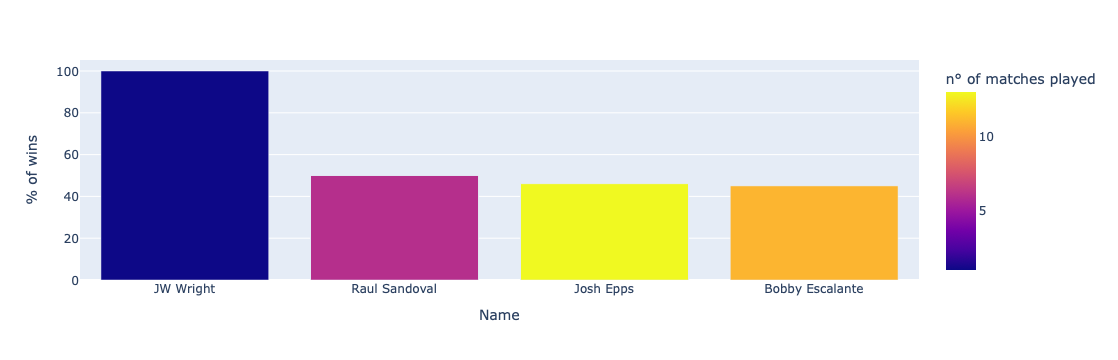

There are 19 undefeated fighters in Flyweightclass and the best 10 are


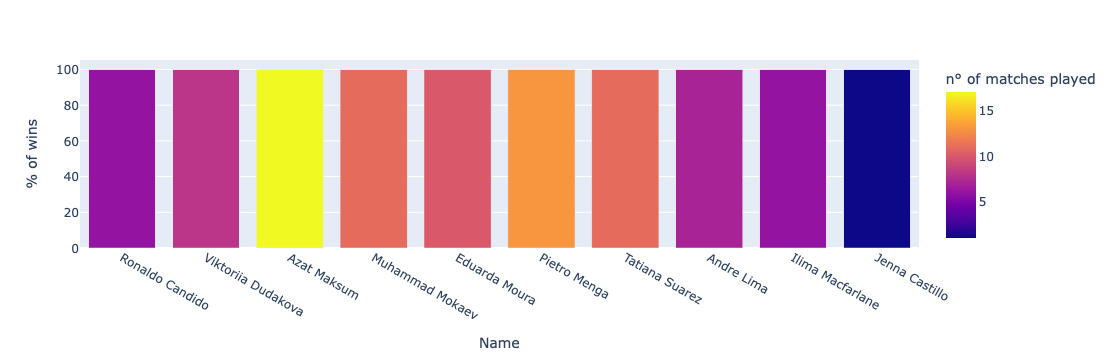

There are 19 undefeated fighters in Middleweightclass and the best 10 are


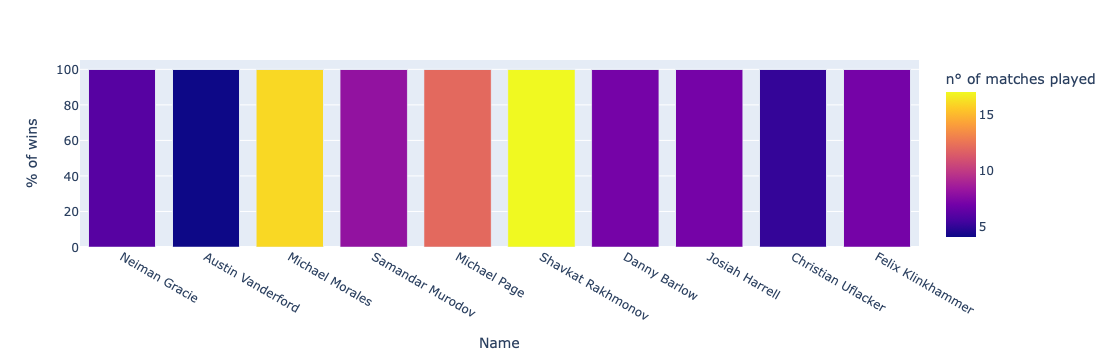

There are 10 undefeated fighters in Not knowclass and the best 10 are


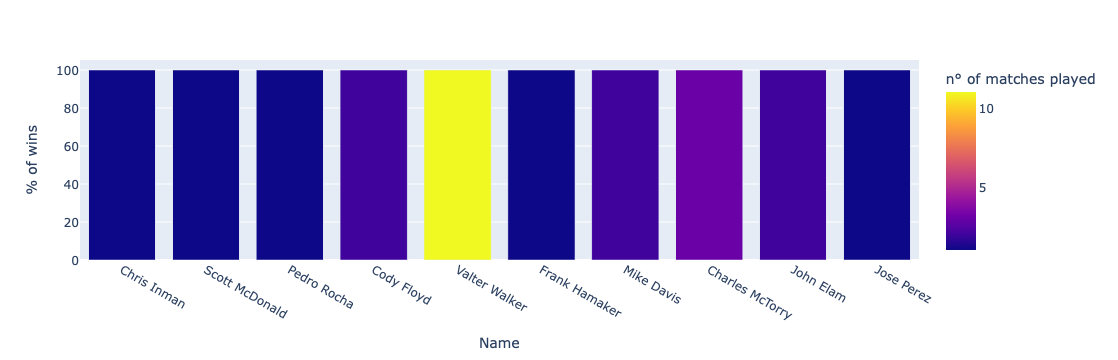

There are 29 undefeated fighters in Light Heavyweightclass and the best 10 are


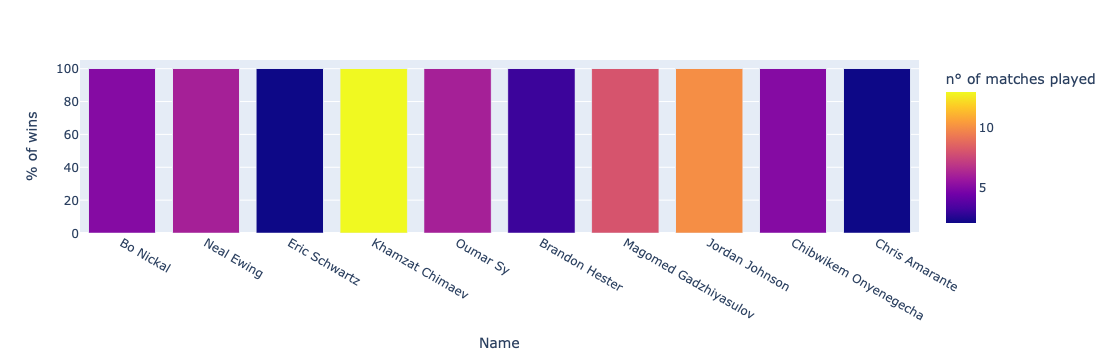

There are 16 undefeated fighters in Welterweightclass and the best 10 are


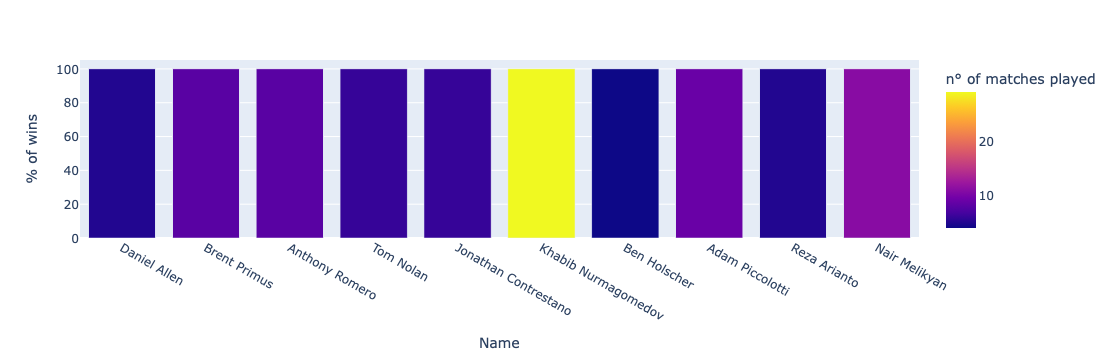

There are 20 undefeated fighters in Heavyweightclass and the best 10 are


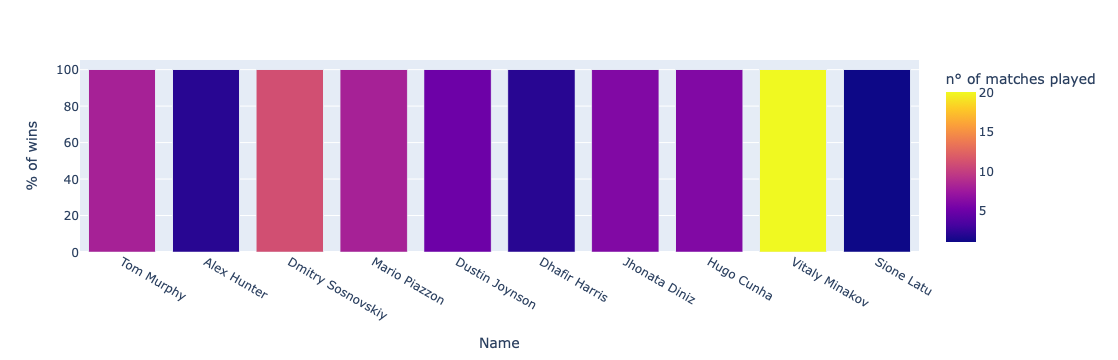

There are 0 undefeated fighters in Lightweightclass and the best 10 are


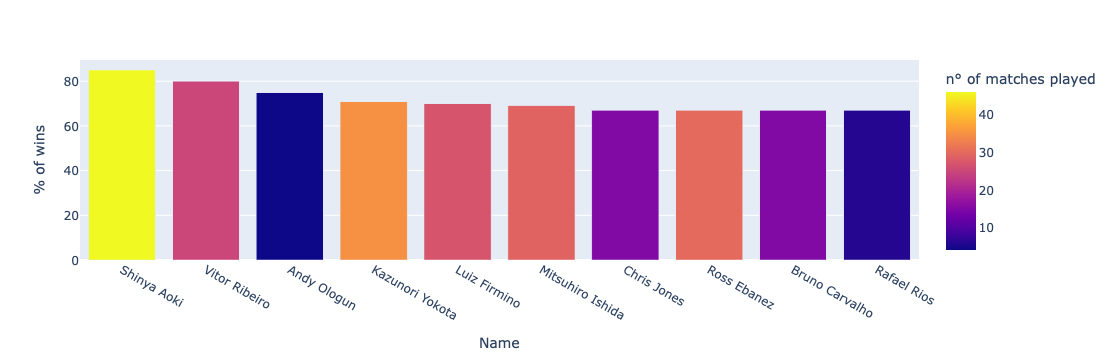

There are 32 undefeated fighters in Featherweightclass and the best 10 are


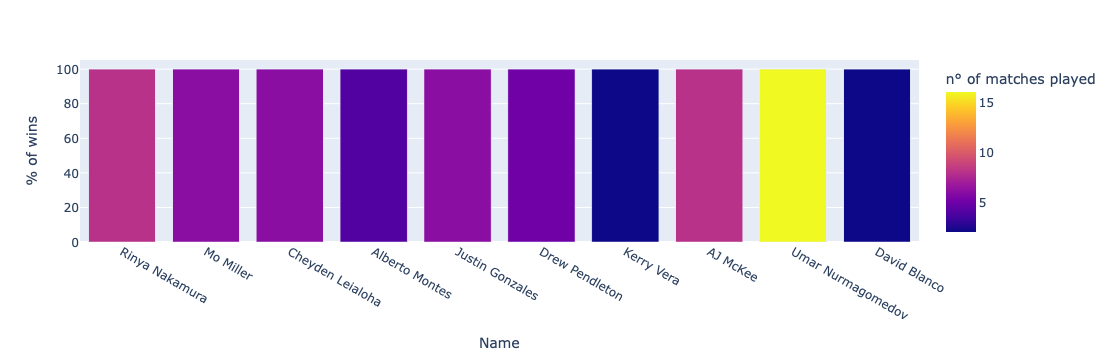

In [61]:
for i in weight_cat_list:
    data_of_cat = df.loc[df["Weight_class"] == i]
    num_of_undefeated = len(data_of_cat[(data_of_cat['win_perc'] == 100)])
    print(f"There are " + start + str(num_of_undefeated) + end + " undefeated fighters in " + start + str(i) + end + "class and the best 10 are")
    fig = px.bar(data_of_cat.sort_values(by=['win_perc'], ascending=False).head(10), x='name',
              y='win_perc',color = "matches_played",
              labels={'name':'Name', "win_perc": "% of wins", "matches_played": "n° of matches played"})
    fig.show()
    num_of_undefeated = data_of_cat[(data_of_cat['win_perc'] == 100)]